In [ ]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import os
import imageio as iio
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
import pandas as pd
from torch import nn,optim, utils

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
train_data = MNIST(root='mnist_data/',download=True)
test_data = MNIST(root='mnist_data/',download=True,train = False)

In [ ]:
train_data.transform = transforms.ToTensor()
test_data.transform =transforms.ToTensor()

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
len(train_data[0])

2

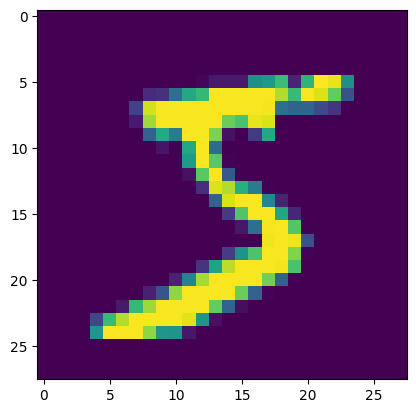

In [ ]:
plt.imshow(np.transpose(train_data[0][0],(1,2,0))) # RGB -> B G R

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data,batch_size=64,shuffle= True)
test_dataloader = torch.utils.data.DataLoader(test_data,batch_size=64,shuffle= False)
# the batch has 64 images with their labels
# batch -> image-label

In [ ]:
batch = next(iter(train_dataloader))

In [ ]:
batch[0][0].shape

torch.Size([1, 28, 28])

torch.Size([28, 28, 1])


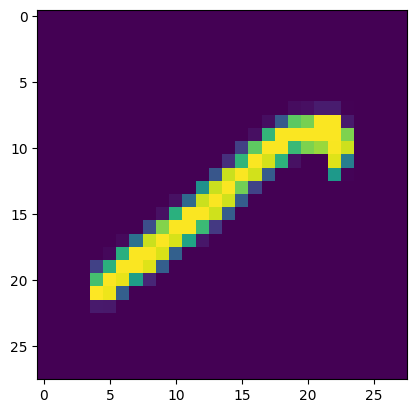

In [ ]:

print(np.transpose(batch[0][0],(2,1,0)).shape) # u might think this is correct
# but you will the find the image rotated the width and height pixels
plt.imshow(np.transpose(batch[0][0],(2,1,0)))

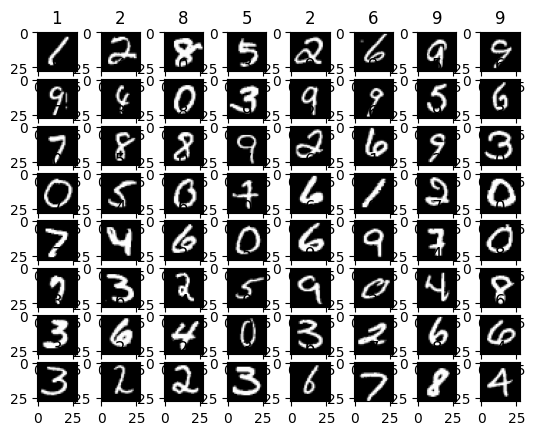

In [ ]:
for i in range(64):
  # 8 rows and 8 columns because 64 images
  plt.subplot(8,8,i+1)
  # batch[0] return the images column, batch[1] get the label column
  # I'm changing the rgb image to BGR cause the plot is stupid
  # cmap turned to gray cause it is a black and white images, one channel
  plt.imshow(np.transpose(batch[0][i],(1,2,0)), cmap="gray")
  # why .item()? test without
  plt.title(batch[1][i].item())

In [ ]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
      super().__init__()
      # the images size is 1 * 28 * 28, u mast flatten the image
      self.layer1 = nn.Linear(28*28,256)
      self.layer2 = nn.Linear(256,128)
      self.layer3 = nn.Linear(128,10)

  def forward(self,x):
    x = torch.relu((self.layer1(x)))
    x = torch.relu((self.layer2(x)))
    x = self.layer3(x)
    return x

model = Model().to(device)

In [ ]:
# Loss
loss_fn =nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr = 1e-4)


In [ ]:

epochs = 20
for epoch in range(epochs):
  total = 0
  for features,labels in train_dataloader:
    optimizer.zero_grad()
  # forward: prediction
    x = features.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    prediction = model(x)
    loss = loss_fn(prediction, labels)
    total += loss.item()
  # backward
    loss.backward()
    optimizer.step()


  print(f'Epoch {epoch+ 1} and the loss {total/len(train_dataloader)}')


Epoch 1 and the loss 0.7071584504582226
Epoch 2 and the loss 0.2925101830872264
Epoch 3 and the loss 0.24161295549892414
Epoch 4 and the loss 0.2071255208102307
Epoch 5 and the loss 0.1822679892960769
Epoch 6 and the loss 0.16223991635654653
Epoch 7 and the loss 0.1453563600425114
Epoch 8 and the loss 0.13109818998493875
Epoch 9 and the loss 0.11836106697820238
Epoch 10 and the loss 0.10806537672444415
Epoch 11 and the loss 0.09799778026673617
Epoch 12 and the loss 0.08933558445801136
Epoch 13 and the loss 0.08200750657037567
Epoch 14 and the loss 0.07520623164855118
Epoch 15 and the loss 0.0686489397591389
Epoch 16 and the loss 0.06331164542802059
Epoch 17 and the loss 0.05868655426957921
Epoch 18 and the loss 0.0537415227449652
Epoch 19 and the loss 0.04930930696666114
Epoch 20 and the loss 0.045457912767842126


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for X,y in test_dataloader:
    yhat = model(X.reshape(-1,28*28).to(device))
    labels = torch.argmax(yhat, dim = 1)
    correct +=  torch.sum(labels.to(device)==y.to(device))
    total += len(batch[1])


print(f"accuracy is {correct/total}")



accuracy is 0.971636176109314


In [ ]:
!pip install torchmetrics

In [ ]:
import torch

preds = []
targets = []

# Assuming you are using a PyTorch DataLoader for test_dataloader
for feature, target in test_dataloader:
    # Reshape feature if necessary and forward pass through the model
    predict = model(feature.view(-1, 28*28).to(device))

    # Collecting the predictions
    # Use torch.argmax to get the predicted class (assuming a classification problem)
    preds.extend(torch.argmax(predict, dim=1).tolist())

    # Collecting the targets/labels
    targets.extend(target.tolist())

# Convert lists to tensors for further processing if necessary
preds = torch.tensor(preds)
targets = torch.tensor(targets)


In [ ]:
from torchmetrics.classification import MulticlassAccuracy
metric = MulticlassAccuracy(num_classes=10)
metric(preds, targets)

tensor(0.9760)

# Now let's do CNN


In [ ]:
import torch.nn as nn
# this is our same model
# but let's update it !
'''
class Model(nn.Module):
  def __init__(self):
      super().__init__()
      # Here we add conv layers


      # the images size is 1 *  * , u mast flatten the image
      self.layer1 = nn.Linear(?*?,256)
      self.layer2 = nn.Linear(256,128)
      self.layer3 = nn.Linear(128,10)

  def forward(self,x):
    # do forward conv

    x = torch.relu((self.layer1(x)))
    x = torch.relu((self.layer2(x)))
    x = self.layer3(x)
    return x
'''

class CNNModel(nn.Module):
  def __init__(self):
      super().__init__()
      # Here we add conv layers
      # in channles - out channels - kernel size - stride - padding
      # in-kernal/stride + 1 => 28-3 +1 = 26, that is why by paddign 1
      # 30 -3 +1 = 28
      self.conv1 = nn.Conv2d(in_channels = 1,
                             out_channels=16,
                             kernel_size = 3,
                             stride = 1,
                             padding = 1)
      # same thing padding 1
      self.conv2 = nn.Conv2d(in_channels = 16,
                             out_channels=32,
                             kernel_size = 3,
                             stride = 1,
                             padding = 1)


      #However, we are doing maxpooling or stride to reduce dimentionality
      # I will do max pooling
      # the images size is 1 *  * , u mast flatten the image
      self.layer1 = nn.Linear(32*7*7,256)
      self.layer2 = nn.Linear(256,128)
      self.layer3 = nn.Linear(128,10)

  def forward(self,x):
    # do forward conv
    x1 = torch.relu(self.conv1(x))
    # 28 -> 14
    x = F.max_pool2d(x1,(2,2))

    x2 = torch.relu(self.conv2(x))
    # 14 -> 7
    x = F.max_pool2d(x2,(2,2))
    # the image size now is 32,7,7
    x = x.view(-1,32*7*7)
    x = torch.relu((self.layer1(x)))
    x = torch.relu((self.layer2(x)))
    x = self.layer3(x)
    return x1,x2,x


cnnmodel = CNNModel().to(device)

In [ ]:
# Let's see how the image changes before doing anything

batch = next(iter(train_dataloader))
features = batch[0].to(device)
x1,x2,_= cnnmodel(features)

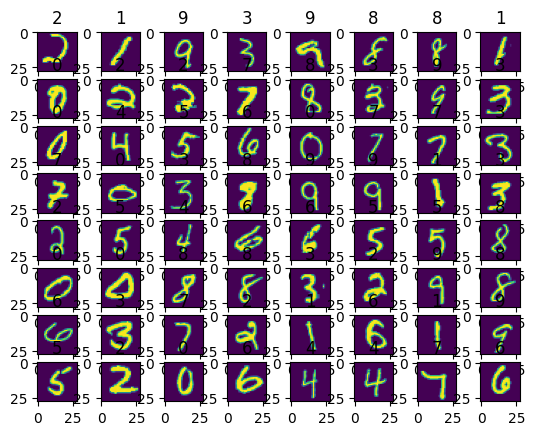

In [ ]:
for i in range(64):
  # 8 rows and 8 columns because 64 images
  plt.subplot(8,8,i+1)
  features = features.detach().cpu()
  plt.imshow(features[i][0])
  plt.title(batch[1][i].item())

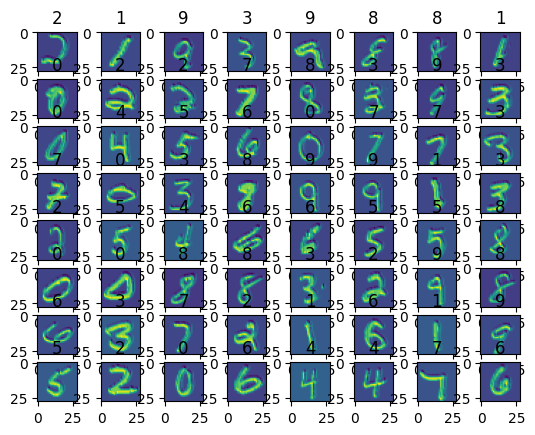

In [ ]:
for i in range(64):
  # 8 rows and 8 columns because 64 images
  plt.subplot(8,8,i+1)
  x1 = x1.detach().cpu()
  plt.imshow(x1[i][0])
  plt.title(batch[1][i].item())

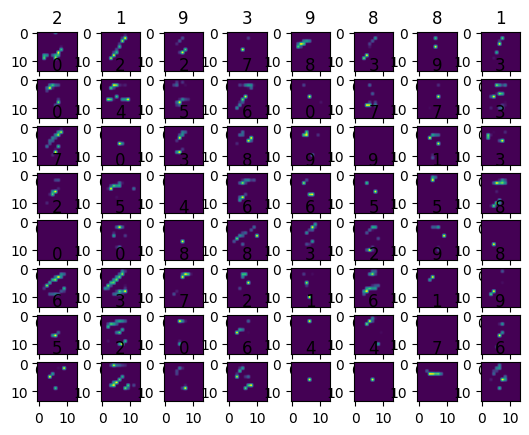

In [ ]:
for i in range(64):
  # 8 rows and 8 columns because 64 images
  plt.subplot(8,8,i+1)
  x2 = x2.detach().cpu()
  plt.imshow(x2[i][0])
  plt.title(batch[1][i].item())

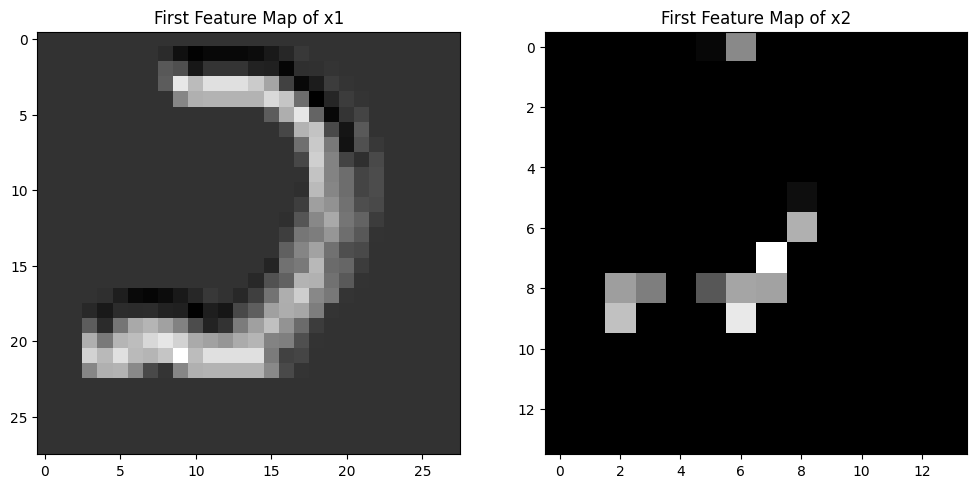

In [ ]:
# Convert to numpy for plotting
# Make sure to detach and move the tensor to cpu
x1_np = x1.detach().cpu().numpy()
x2_np = x2.detach().cpu().numpy()

# Select the first feature map from x1 and x2 for visualization
# Change index 0 if you want to see other feature maps
x1_feature_map = x1_np[0][0,:,:]
x2_feature_map = x2_np[0][0,:,:]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(x1_feature_map, cmap='gray')
axes[0].set_title('First Feature Map of x1')
axes[1].imshow(x2_feature_map, cmap='gray')
axes[1].set_title('First Feature Map of x2')
plt.show()


In [ ]:
cnnmodel = CNNModel().to(device)
# Loss
loss_fn =nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(cnnmodel.parameters(), lr = 1e-4)

epochs = 10
for epoch in range(epochs):
  total = 0
  for features,labels in train_dataloader:
    optimizer.zero_grad()
  # forward: prediction
    features = features.to(device)
    labels = labels.to(device)
    _,_,prediction = cnnmodel(features)
    loss = loss_fn(prediction, labels)
    total += loss.item()
  # backward
    loss.backward()
    optimizer.step()


  print(f'Epoch {epoch+ 1} and the loss {total/len(train_dataloader)}')


Epoch 1 and the loss 0.6796611292180477
Epoch 2 and the loss 0.20709748276229353
Epoch 3 and the loss 0.1324664166421572
Epoch 4 and the loss 0.09874241038271264
Epoch 5 and the loss 0.08017386202323142
Epoch 6 and the loss 0.06841124174322115
Epoch 7 and the loss 0.059992437914156836
Epoch 8 and the loss 0.052827843195095515
Epoch 9 and the loss 0.04725340303882007
Epoch 10 and the loss 0.04287940365468849


In [ ]:
import torch

preds = []
targets = []

# Assuming you are using a PyTorch DataLoader for test_dataloader
for feature, target in test_dataloader:
    # Reshape feature if necessary and forward pass through the model
    feature =feature.to(device)
    _,_,predict = cnnmodel(feature)

    # Collecting the predictions
    # Use torch.argmax to get the predicted class (assuming a classification problem)
    preds.extend(torch.argmax(predict, dim=1).tolist())

    # Collecting the targets/labels
    targets.extend(target.tolist())

# Convert lists to tensors for further processing if necessary
preds = torch.tensor(preds)
targets = torch.tensor(targets)


In [ ]:
from torchmetrics.classification import MulticlassAccuracy
metric = MulticlassAccuracy(num_classes=10)
metric(preds, targets)

tensor(0.9863)